In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/github-daily-trending-repos/github_daily_trending.csv


In [2]:
!ls

In [3]:
df = pd.read_csv('/kaggle/input/github-daily-trending-repos/github_daily_trending.csv')
df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [4]:
df.isna().sum()

org_name               0
repo_name              0
repo_url               0
description            0
language              65
star                 156
forks                156
daily_star             0
date                   0
trending_category      0
dtype: int64

In [5]:
df.describe()

,star,forks,daily_star
count,10265.000000,10265.000000,10421.000000
mean,23771.689138,3775.397857,75.416659
std,40351.665508,7616.520238,244.321263
min,23.000000,3.000000,0.000000
25%,4546.000000,498.000000,5.000000
50%,11890.000000,1351.000000,15.000000
75%,26274.000000,3603.000000,48.000000
max,408622.000000,78939.000000,8559.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10421 entries, 0 to 10420
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_name           10421 non-null  object 
 1   repo_name          10421 non-null  object 
 2   repo_url           10421 non-null  object 
 3   description        10421 non-null  object 
 4   language           10356 non-null  object 
 5   star               10265 non-null  float64
 6   forks              10265 non-null  float64
 7   daily_star         10421 non-null  int64  
 8   date               10421 non-null  object 
 9   trending_category  10421 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 814.3+ KB


<Axes: >

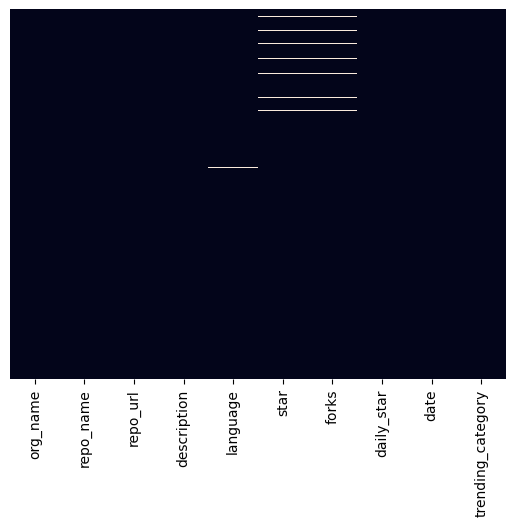

In [7]:
sns.heatmap(data=df.isna(), cbar=False, yticklabels=False)

In [8]:
df.columns

Index(['org_name', 'repo_name', 'repo_url', 'description', 'language', 'star',
       'forks', 'daily_star', 'date', 'trending_category'],
      dtype='object')

In [9]:
df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [10]:
df['language'].unique()

array(['Go', 'Python', 'Rust', 'Ruby', 'Kotlin', 'Makefile',
       'Jupyter Notebook', 'TypeScript', 'Svelte', 'C', 'Markdown', 'C++',
       'C#', nan, 'Java', 'HTML', 'JavaScript', 'PHP', 'Shell', 'CSS',
       'MDX', 'Swift', 'Dart', 'Vue', 'LLVM', 'PowerShell', 'Blade',
       'Haskell', 'Zig', 'Lua', 'Elixir', 'PureScript', 'Scala', 'CMake'],
      dtype=object)

In [11]:
df.loc[df['language'] == 'Python']['description']

437      Learn how to design large-scale systems. Prep ...
438                                Stable Diffusion web UI
439                   Free, open source crypto trading bot
440              A recursive internet scanner for hackers.
441      The official gpt4free repository | various col...
                               ...                        
10290                                   My Python Examples
10291    🚀🚀 「大模型」3小时完全从0训练26M的小参数GPT！🌏 Train a 26M-para...
10292    SANA: Efficient High-Resolution Image Synthesi...
10293    A feature-rich command-line audio/video downlo...
10294         music library manager and MusicBrainz tagger
Name: description, Length: 1412, dtype: object

In [12]:
df['language'].isna().sum()

65

In [13]:
duplicate_df = df.copy()
duplicate_df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [14]:
duplicate_df.isna().sum()

org_name               0
repo_name              0
repo_url               0
description            0
language              65
star                 156
forks                156
daily_star             0
date                   0
trending_category      0
dtype: int64

### Fill NAN values 

In [15]:
fill_values = {'language':'unavailable language', 'star': df['star'].mean(), 'forks': df['forks'].mean()}
duplicate_df.fillna(fill_values, inplace=True)

In [16]:
duplicate_df['date']

0        2024-11-17
1        2024-11-17
2        2024-11-17
3        2024-11-17
4        2024-11-17
            ...    
10416    2025-01-12
10417    2025-01-12
10418    2025-01-12
10419    2025-01-12
10420    2025-01-12
Name: date, Length: 10421, dtype: object

### Convert Date column object to date_format using pd.to_datetime()

In [17]:
duplicate_df['date'] = pd.to_datetime(duplicate_df['date'], errors='coerce')


In [18]:
duplicate_df.isna().sum()

org_name             0
repo_name            0
repo_url             0
description          0
language             0
star                 0
forks                0
daily_star           0
date                 0
trending_category    0
dtype: int64

In [19]:
duplicate_df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


<Axes: >

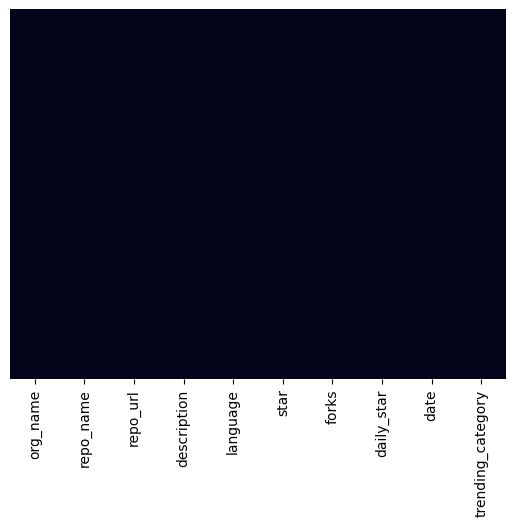

In [20]:
sns.heatmap(data=duplicate_df.isna(), cbar=False, yticklabels=False)

<Axes: title={'center': 'Trending Category Language'}, xlabel='count', ylabel='trending_category'>

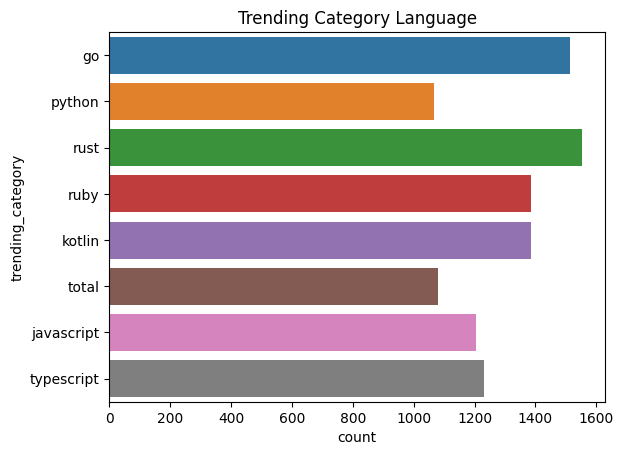

In [21]:
plt.title('Trending Category Language')
sns.countplot(y='trending_category', data=duplicate_df)

In [22]:
duplicate_df[duplicate_df['trending_category'] == 'python']

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
437,donnemartin,system-design-primer,https://github.com/donnemartin/system-design-p...,Learn how to design large-scale systems. Prep ...,Python,276079.0,46342.0,211,2024-11-17,python
438,AUTOMATIC1111,stable-diffusion-webui,https://github.com/AUTOMATIC1111/stable-diffus...,Stable Diffusion web UI,Python,142992.0,26951.0,63,2024-11-17,python
439,freqtrade,freqtrade,https://github.com/freqtrade/freqtrade,"Free, open source crypto trading bot",Python,29089.0,6208.0,24,2024-11-17,python
440,blacklanternsecurity,bbot,https://github.com/blacklanternsecurity/bbot,A recursive internet scanner for hackers.,Python,5680.0,464.0,209,2024-11-17,python
441,xtekky,gpt4free,https://github.com/xtekky/gpt4free,The official gpt4free repository | various col...,Python,61291.0,13327.0,18,2024-11-17,python
...,...,...,...,...,...,...,...,...,...,...
10290,geekcomputers,Python,https://github.com/geekcomputers/Python,My Python Examples,Python,32293.0,12365.0,15,2025-01-12,python
10291,jingyaogong,minimind,https://github.com/jingyaogong/minimind,🚀🚀 「大模型」3小时完全从0训练26M的小参数GPT！🌏 Train a 26M-para...,Python,4676.0,542.0,187,2025-01-12,python
10292,NVlabs,Sana,https://github.com/NVlabs/Sana,SANA: Efficient High-Resolution Image Synthesi...,Python,1953.0,100.0,24,2025-01-12,python
10293,yt-dlp,yt-dlp,https://github.com/yt-dlp/yt-dlp,A feature-rich command-line audio/video downlo...,Python,96081.0,7533.0,113,2025-01-12,python


In [23]:
duplicate_df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


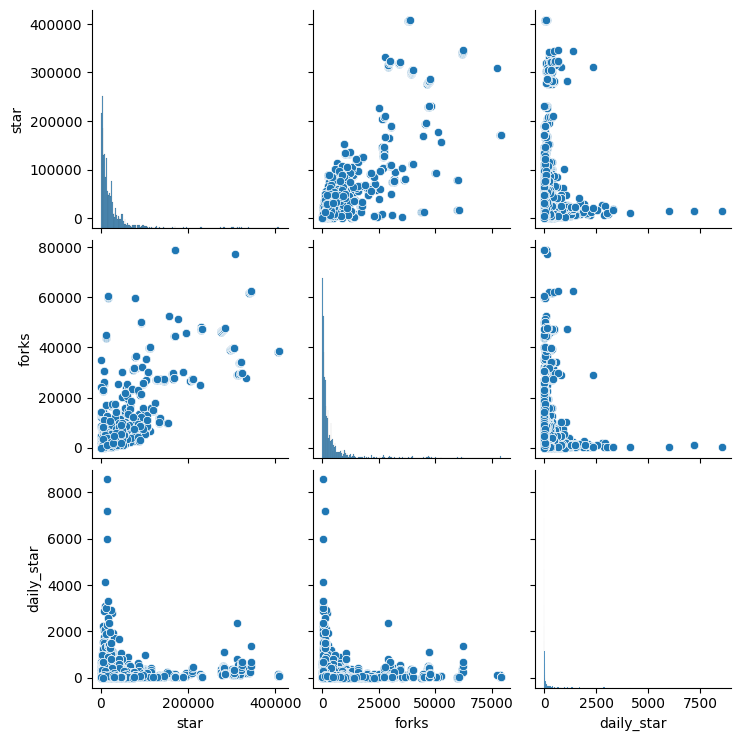

In [24]:
sns.pairplot(data=duplicate_df)

<Axes: xlabel='daily_star', ylabel='date'>

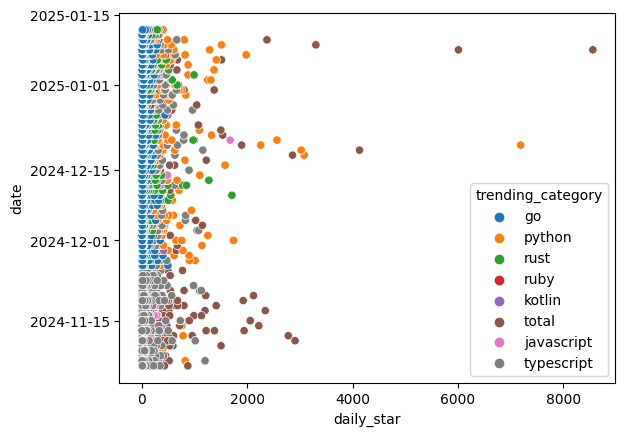

In [25]:
sns.scatterplot(data=duplicate_df, x='daily_star', y='date', hue='trending_category')

In [26]:
duplicate_df['date'].unique()

<DatetimeArray>
['2024-11-17 00:00:00', '2024-11-18 00:00:00', '2024-11-08 00:00:00',
 '2024-11-21 00:00:00', '2024-11-10 00:00:00', '2024-11-16 00:00:00',
 '2024-11-14 00:00:00', '2024-11-22 00:00:00', '2024-11-07 00:00:00',
 '2024-11-15 00:00:00', '2024-11-25 00:00:00', '2024-11-20 00:00:00',
 '2024-11-24 00:00:00', '2024-11-06 00:00:00', '2024-11-13 00:00:00',
 '2024-11-23 00:00:00', '2024-11-09 00:00:00', '2024-11-11 00:00:00',
 '2024-11-19 00:00:00', '2024-11-12 00:00:00', '2024-11-26 00:00:00',
 '2024-11-27 00:00:00', '2024-11-28 00:00:00', '2024-11-29 00:00:00',
 '2024-11-30 00:00:00', '2024-12-01 00:00:00', '2024-12-02 00:00:00',
 '2024-12-03 00:00:00', '2024-12-04 00:00:00', '2024-12-05 00:00:00',
 '2024-12-06 00:00:00', '2024-12-07 00:00:00', '2024-12-08 00:00:00',
 '2024-12-09 00:00:00', '2024-12-10 00:00:00', '2024-12-11 00:00:00',
 '2024-12-12 00:00:00', '2024-12-13 00:00:00', '2024-12-14 00:00:00',
 '2024-12-15 00:00:00', '2024-12-16 00:00:00', '2024-12-17 00:00:00',
 '20

In [27]:
duplicate_df['org_name'].unique()

array(['terrastruct', 'tinygo-org', 'Melkeydev', ..., 'Morganamilo',
       'dlvhdr', 'icereed'], dtype=object)

<Axes: >

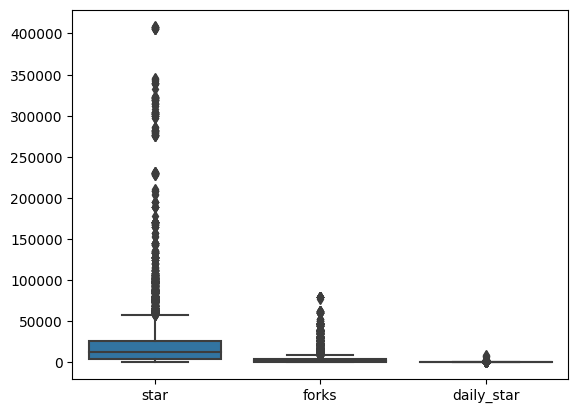

In [28]:
sns.boxplot(data=duplicate_df)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

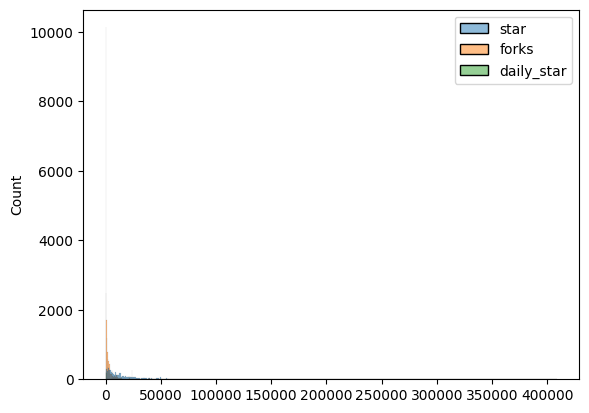

In [29]:
sns.histplot(data=duplicate_df)

In [30]:
df.loc[0:4, ['date']]

,date
0,2024-11-17
1,2024-11-17
2,2024-11-17
3,2024-11-17
4,2024-11-17


In [31]:
df.loc[0:5, ['date']]

,date
0,2024-11-17
1,2024-11-17
2,2024-11-17
3,2024-11-17
4,2024-11-17
5,2024-11-17


In [32]:
df.loc[:5, ['date']]

,date
0,2024-11-17
1,2024-11-17
2,2024-11-17
3,2024-11-17
4,2024-11-17
5,2024-11-17


In [33]:
df.loc[:4, ['date']]

,date
0,2024-11-17
1,2024-11-17
2,2024-11-17
3,2024-11-17
4,2024-11-17


In [34]:
df.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go


In [35]:
df.loc[(df['daily_star'] < 5) & (df['daily_star'] > 20), ['org_name', 'repo_name']]

,org_name,repo_name


In [36]:
df[df['daily_star'] > 20]

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
6,daytonaio,daytona,https://github.com/daytonaio/daytona,The Open Source Dev Environment Manager.,Go,10583.0,839.0,155,2024-11-17,go
8,milvus-io,milvus,https://github.com/milvus-io/milvus,"A cloud-native vector database, storage for ne...",Go,30702.0,2927.0,23,2024-11-17,go
13,FiloSottile,mkcert,https://github.com/FiloSottile/mkcert,A simple zero-config tool to make locally trus...,Go,50227.0,2626.0,94,2024-11-17,go
...,...,...,...,...,...,...,...,...,...,...
10407,1Panel-dev,1Panel,https://github.com/1Panel-dev/1Panel,🔥 Top-Rated Web-Based Linux Server Management ...,Go,24898.0,2233.0,22,2025-01-12,go
10408,encoredev,encore,https://github.com/encoredev/encore,Open Source Development Platform for building ...,Go,8591.0,354.0,25,2025-01-12,go
10413,IceWhaleTech,CasaOS,https://github.com/IceWhaleTech/CasaOS,"CasaOS - A simple, easy-to-use, elegant open-s...",Go,27950.0,1516.0,21,2025-01-12,go
10417,apache,answer,https://github.com/apache/answer,A Q&A platform software for teams at any scale...,Go,13357.0,1052.0,58,2025-01-12,go


In [37]:
df.loc[df['daily_star'] > 20]

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
6,daytonaio,daytona,https://github.com/daytonaio/daytona,The Open Source Dev Environment Manager.,Go,10583.0,839.0,155,2024-11-17,go
8,milvus-io,milvus,https://github.com/milvus-io/milvus,"A cloud-native vector database, storage for ne...",Go,30702.0,2927.0,23,2024-11-17,go
13,FiloSottile,mkcert,https://github.com/FiloSottile/mkcert,A simple zero-config tool to make locally trus...,Go,50227.0,2626.0,94,2024-11-17,go
...,...,...,...,...,...,...,...,...,...,...
10407,1Panel-dev,1Panel,https://github.com/1Panel-dev/1Panel,🔥 Top-Rated Web-Based Linux Server Management ...,Go,24898.0,2233.0,22,2025-01-12,go
10408,encoredev,encore,https://github.com/encoredev/encore,Open Source Development Platform for building ...,Go,8591.0,354.0,25,2025-01-12,go
10413,IceWhaleTech,CasaOS,https://github.com/IceWhaleTech/CasaOS,"CasaOS - A simple, easy-to-use, elegant open-s...",Go,27950.0,1516.0,21,2025-01-12,go
10417,apache,answer,https://github.com/apache/answer,A Q&A platform software for teams at any scale...,Go,13357.0,1052.0,58,2025-01-12,go


In [38]:
df.loc[df['language'].isin(['Go', 'Python'])]

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go
3,jeessy2,ddns-go,https://github.com/jeessy2/ddns-go,"Simple and easy to use DDNS. Support Aliyun, T...",Go,12117.0,1398.0,25,2024-11-17,go
4,JanDeDobbeleer,oh-my-posh,https://github.com/JanDeDobbeleer/oh-my-posh,The most customisable and low-latency cross pl...,Go,17450.0,2390.0,16,2024-11-17,go
...,...,...,...,...,...,...,...,...,...,...
10416,icereed,paperless-gpt,https://github.com/icereed/paperless-gpt,Use LLMs and LLM Vision (OCR) to handle paperl...,Go,288.0,13.0,17,2025-01-12,go
10417,apache,answer,https://github.com/apache/answer,A Q&A platform software for teams at any scale...,Go,13357.0,1052.0,58,2025-01-12,go
10418,trustwallet,assets,https://github.com/trustwallet/assets,"A comprehensive, up-to-date collection of info...",Go,4749.0,23018.0,3,2025-01-12,go
10419,mudler,LocalAI,https://github.com/mudler/LocalAI,"🤖 The free, Open Source alternative to OpenAI,...",Go,28235.0,2125.0,65,2025-01-12,go


In [39]:
df.loc[[0,1,2]]

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
0,terrastruct,d2,https://github.com/terrastruct/d2,D2 is a modern diagram scripting language that...,Go,17896.0,439.0,418,2024-11-17,go
1,tinygo-org,tinygo,https://github.com/tinygo-org/tinygo,Go compiler for small places. Microcontrollers...,Go,15463.0,912.0,6,2024-11-17,go
2,Melkeydev,go-blueprint,https://github.com/Melkeydev/go-blueprint,Go-blueprint allows users to spin up a quick G...,Go,4608.0,276.0,9,2024-11-17,go


In [40]:
df.loc[4]

org_name                                                JanDeDobbeleer
repo_name                                                   oh-my-posh
repo_url                  https://github.com/JanDeDobbeleer/oh-my-posh
description          The most customisable and low-latency cross pl...
language                                                            Go
star                                                           17450.0
forks                                                           2390.0
daily_star                                                          16
date                                                        2024-11-17
trending_category                                                   go
Name: 4, dtype: object

In [41]:
df.iloc[4]

org_name                                                JanDeDobbeleer
repo_name                                                   oh-my-posh
repo_url                  https://github.com/JanDeDobbeleer/oh-my-posh
description          The most customisable and low-latency cross pl...
language                                                            Go
star                                                           17450.0
forks                                                           2390.0
daily_star                                                          16
date                                                        2024-11-17
trending_category                                                   go
Name: 4, dtype: object

In [42]:
df['star'].describe()

count     10265.000000
mean      23771.689138
std       40351.665508
min          23.000000
25%        4546.000000
50%       11890.000000
75%       26274.000000
max      408622.000000
Name: star, dtype: float64

<Axes: >

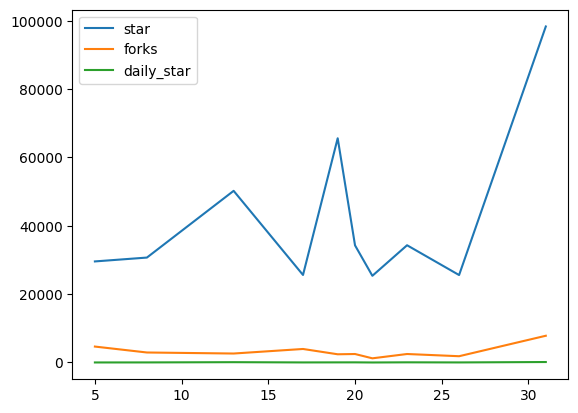

In [43]:
popular_repo = df.loc[df['star'] > df['star'].mean()]
popular_repo.head(10).plot()

In [44]:
popular_repo.head()

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category
5,v2fly,v2ray-core,https://github.com/v2fly/v2ray-core,A platform for building proxies to bypass netw...,Go,29573.0,4663.0,12,2024-11-17,go
8,milvus-io,milvus,https://github.com/milvus-io/milvus,"A cloud-native vector database, storage for ne...",Go,30702.0,2927.0,23,2024-11-17,go
13,FiloSottile,mkcert,https://github.com/FiloSottile/mkcert,A simple zero-config tool to make locally trus...,Go,50227.0,2626.0,94,2024-11-17,go
17,XTLS,Xray-core,https://github.com/XTLS/Xray-core,"Xray, Penetrates Everything. Also the best v2r...",Go,25613.0,3956.0,21,2024-11-17,go
19,junegunn,fzf,https://github.com/junegunn/fzf,🌸 A command-line fuzzy finder,Go,65610.0,2405.0,37,2024-11-17,go


In [45]:
daily_star = duplicate_df['daily_star']
daily_star.describe()

count    10421.000000
mean        75.416659
std        244.321263
min          0.000000
25%          5.000000
50%         15.000000
75%         48.000000
max       8559.000000
Name: daily_star, dtype: float64

<Axes: >

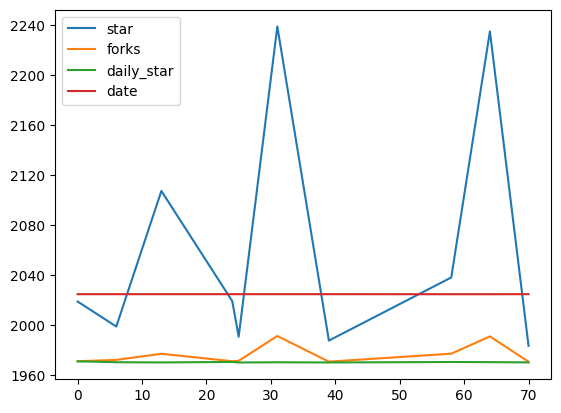

In [46]:
popular_daily_star = duplicate_df.loc[daily_star > daily_star.mean()]
popular_daily_star.head(10).plot()

<Axes: >

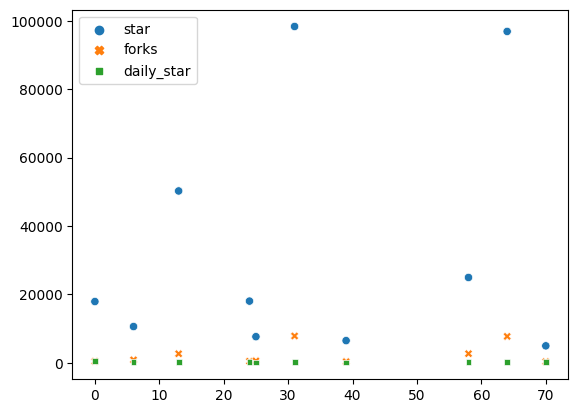

In [47]:
sns.scatterplot(data=popular_daily_star.head(10))

<Axes: xlabel='count', ylabel='language'>

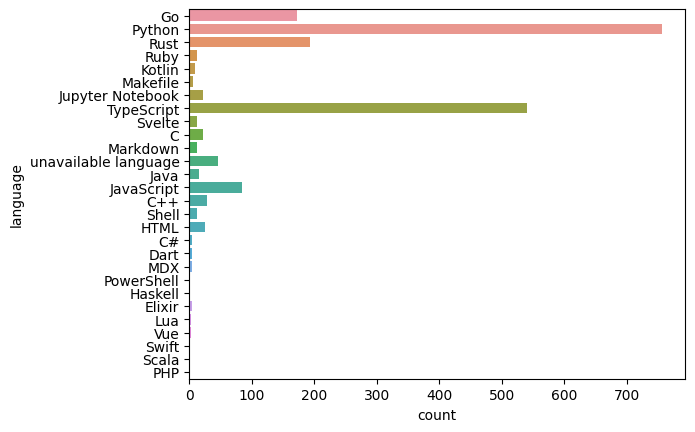

In [48]:
sns.countplot(data=popular_daily_star, y='language')

In [49]:
lan_col = duplicate_df.loc[duplicate_df.trending_category.isin(['Python', 'TypeScript'])]

In [50]:
lan_col

,org_name,repo_name,repo_url,description,language,star,forks,daily_star,date,trending_category


<Axes: xlabel='star', ylabel='daily_star'>

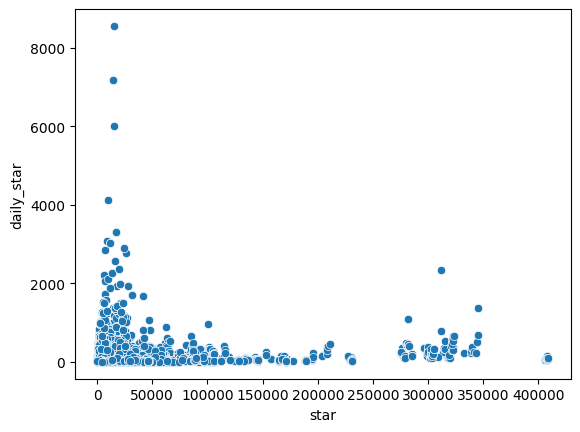

In [53]:
sns.scatterplot(data=duplicate_df, x='star', y='daily_star')